In [1]:
#initial import of values
import numpy
import random
import math
import matplotlib.image as img
img=img.imread(r"desktop\len.png")
from matplotlib import pyplot as plt
import matplotlib

In [2]:
#sobel operator functioning code
def Convolution(img1, img2):
    sum = 0
    for i in range(len(img1[1,:])):
        for j in range(len(img2[1,:])):
            sum = sum + img1[i,j]*img2[len(img1[1,:])-i-1,len(img2[1,:])-j-1]
    return sum
    
def Sobel(img):
    Gx1 = numpy.array([ [-1.0, 0.0, 1.0], [-2.0, 0.0, 2.0],[-1.0, 0.0, 1.0]])
    Gy1 =numpy.array( [ [-1.0, -2.0, -1.0], [0.0, 0.0, 0.0],[1.0, 2.0, 1.0]])
    A_return = numpy.copy(img)
    for i in range(1,len(img[1,:])-1):
        #lista = []
        for j in range(1,len(img[:,1])-1):
            B = numpy.array([[img[i-1, j-1], img[i-1,j], img[i-1, j+1]],[ img[i,j-1], img[i,j], img[i,j+1]],[img[i+1,j-1], img[i+1,j], img[i+1,j+1]]])
            Gx = Convolution(Gx1,B)
            Gy = Convolution(Gy1,B)
            A_return[i,j] = numpy.sqrt(Gx*Gx+Gy*Gy)
    return A_return

In [3]:
def func1(x, l):
    return x * l

def func2(x, l):
    return l * x**2
    
def func3(x, l):
    return math.sin((numpy.pi * x) / (2.0*l))
    
def func4(x, l):
    return math.sin(numpy.pi * x * math.sin((numpy.pi * x) / (l)) / l)


In [4]:
#main class which executes the entire ant colony procedure
class ACO:
    def __init__(self,img, br_iter,br_ant,br_step,alpha,beta,phi,rho,treshold, tau, lambd, f=func1):
        
        
        self.img = img
        self.br_iter = br_iter
        self.br_ant = br_ant
        self.br_step = br_step
        self.alpha = alpha
        self.beta = beta
        self.phi = phi
        self.rho = rho
        self.treshold = treshold
        self.tau = tau
    
        self.Pheromones = numpy.copy(img)
        for i in range(len(img[:,1])):
        for j in range(len(img[1,:])):
        self.Pheromones[i,j] = tau    
        self.delta_tau = [] 
        for i in range(len(img[:,1])):
            lista = []
            for j in range(len(img[1,:])):
                lista.append(0.0)
            self.delta_tau.append(lista)
        self.SobelM = Sobel(img)
        self.Informations = []
        
        for i in range(len(img[:,1])):
            lista = []
            for j in range(len(img[:,1])):
                if self.SobelM[i,j][0]*numpy.sqrt(len(self.SobelM[i,j])) > treshold:
                    lista.append(f(self.SobelM[i,j][0],lambd))
                    
                else:
                    lista.append(0.0)
            self.Informations.append(lista)
        self.Routes = []
        for i in range(br_ant):
            self.Routes.append([[random.randint(1, len(img[1,:])-1), random.randint(1, len(img[:,1])-1)]])
            
    def run(self):
        for i in range(self.br_iter):
            for j in range(self.br_step):
                for k in range(self.br_ant):
                    self.local_update(k,j)
        self.global_update()
    def local_update(self,k,l):
        #kreiranje okoline
        
        i0=self.Routes[k][l][0]
        j0=self.Routes[k][l][1]
        
        xMinLim=i0-1
        xMaxLim=i0+1
        yMinLim=j0-1
        yMaxLim=j0+1
        if i0==0:           
            xMinLim==0
        if j0==0:
            yMinLim==0
        if i0>=len(self.img[1,:])-1:
            xMaxLim=len(self.img[1,:])-1
        if j0>=len(self.img[:,1])-1:
            yMaxLim=len(self.img[:,1])-1
        neighbourhood=[]
        for i in range(xMinLim, xMaxLim+1): 
            for j in range(yMinLim, yMaxLim+1):
                if (i!=i0 or j!=j0):
                    false = 0
                    for positions in self.Routes[k]:
                        if positions[0]==i and positions[1]==j:
                            false = 1
                            break
                    if false == 0:
                        neighbourhood.append([i,j])
        u=random.random()
        p=0
        
        if not neighbourhood:
            m=i0
            n=j0
            self.Routes[k].append([m,n])
            
        else:
                  
            j=0
            brojac=0           
            while u>p: 
                p= p +float(pow(self.Pheromones[neighbourhood[j][0],neighbourhood[j][1]][0],self.alpha))*float(pow(self.Informations[neighbourhood[j][0]][neighbourhood[j][1]], self.beta))
                
                j+=1
                brojac+=1
                if j==len(neighbourhood):

            j=0
                    
                if brojac >15: 
                    j=random.randint(0, len(neighbourhood))
                    break
                
            self.Routes[k].append(neighbourhood[j-1])
            m=neighbourhood[j-1][0]
            n=neighbourhood[j-1][1]
               
        self.Pheromones[m,n]=(1-self.phi)*self.Pheromones[m,n]+self.phi*self.tau 
        self.delta_tau[m][n]+=self.Informations[m][n]/float(l+1) 
        
    def global_update(self):
        
        for i in range(len(self.img[1,:])):
            for j in range(len(self.img[:,1])):
                self.Pheromones[i,j] = (1- self.rho)*self.Pheromones[i,j] + self.rho*self.delta_tau[i][j]
                
    def showImage(self):
        FinalImage=[]
        
        for i in range(0, len(self.img[1,:])):
            lista=[]
            for j in range(0, len(self.img[:,1])):
                if self.Pheromones[i,j][0]<self.tau:
                    lista.append([1.0,1.0,1.0])
                    
                else:
                    lista.append([0.0,0.0,0.0])
            FinalImage.append(lista)
                        
        plt.imshow(FinalImage, interpolation='nearest')
        plt.show()
        matplotlib.image.imsave('sobel_2iter_5000ant_func1.png', FinalImage)
   

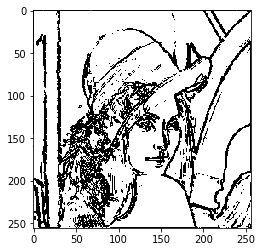

In [5]:
#tau_init=0.1, N=2, L=50, K=512, alpha=1.0, beta=2.0, phi=0.05, rho=0.1, treshold=0.6
a = ACO(img,20,5000,40,1.0,2.0,0.05,0.1,0.6,0.1,10, func1)
a.run()
a.showImage()

In [ ]:
a = ACO(img,20,5000,40,1.0,2.0,0.05,0.1,0.6,0.1,10, func1)
a.run()
a.showImage()